In [132]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import seaborn as sns

In [14]:
import matplotlib.pyplot as plt
import time
import numpy as np

In [134]:
import pandas as pd

In [135]:
import itertools

In [25]:
logger

<module 'logger' from 'C:\\Users\\iamph\\Miniconda3\\envs\\tensorflow\\lib\\site-packages\\logger\\__init__.py'>

In [2]:
# Device Configuration
device = torch.device('cpu')

In [3]:
# Hyperparameters
num_epochs = 5
num_classes = 10
batch_size = 100
learning_rate = 0.001

In [63]:
len(test_dataset[:1000])

ValueError: Too many dimensions: 3 > 2.

In [6]:
# QMNIST Dataset
train_dataset = torchvision.datasets.QMNIST(root='../../data/',
                                           train = True,
                                           transform=transforms.ToTensor(),
                                           download=True)

test_dataset = torchvision.datasets.QMNIST(root='../../data/',
                                       train = True,
                                       transform=transforms.ToTensor(),
                                       download=True)

# Data loader
train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                          batch_size = batch_size,
                                          shuffle = True)

test_loader = torch.utils.data.DataLoader(dataset = test_dataset,
                                         batch_size = batch_size,
                                         shuffle = False)

In [8]:
display_loader = torch.utils.data.DataLoader(train_dataset, batch_size=20)

In [10]:
batch = next(iter(display_loader))
images, labels = batch

print('types:', type(images), type(labels))
print('shapes:', images.shape, labels.shape)

types: <class 'torch.Tensor'> <class 'torch.Tensor'>
shapes: torch.Size([20, 1, 28, 28]) torch.Size([20])


labels: tensor([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9])


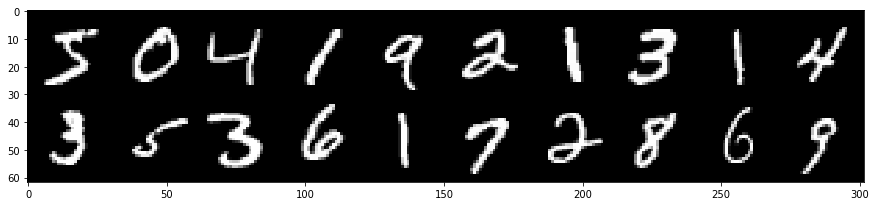

In [15]:
# Let's take a look at the dataset
grid = torchvision.utils.make_grid(images, nrow=10)

plt.figure(figsize = (15,15))
plt.imshow(np.transpose(grid, (1,2,0))) #grid.permute is also okay

print('labels:', labels)

In [36]:
#CNN (two layers)
class ConvNet(nn.Module):
    def __init__(self, input_size=784, hidden_size=500, num_classes=10):
        super(ConvNet, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.fc = nn.Linear(7*7*32, num_classes)
        
    def forward(self,x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc(out)
        return out

In [75]:
model = ConvNet(num_classes).to(device)

# Loss and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

### Interim: I want to see how I can get the accuracy of the model

labels: tensor([4, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 8, 9, 0, 1, 2, 3, 4, 5,
        6, 7, 8, 9, 6, 0, 3, 4, 1, 4, 0, 7, 8, 7, 7, 9, 0, 4, 9, 4, 0, 5, 8, 5,
        9, 8, 8, 4, 0, 7, 1, 3, 5, 3, 1, 6, 5, 3, 8, 7, 3, 1, 6, 8, 5, 9, 2, 2,
        0, 9, 2, 4, 6, 7, 3, 1, 3, 6, 6, 2, 1, 2, 6, 0, 7, 8, 9, 2, 9, 5, 1, 8,
        3, 5, 6, 8])


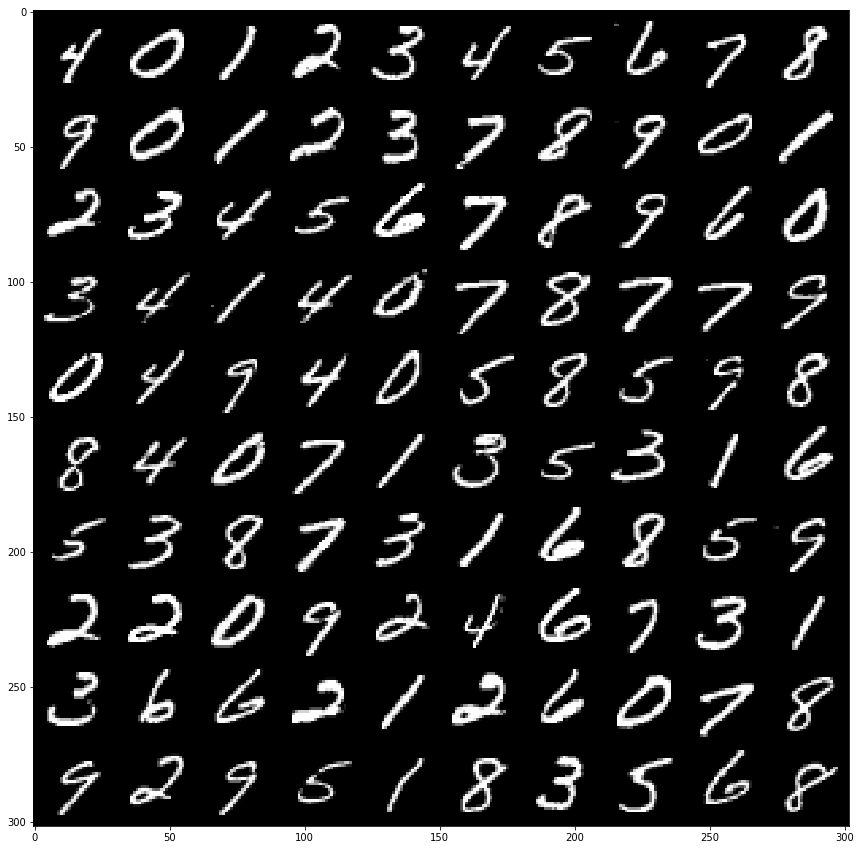

In [62]:
# Let's take a look at the dataset
grid = torchvision.utils.make_grid(images, nrow=10)

plt.figure(figsize = (15,15))
plt.imshow(np.transpose(grid, (1,2,0))) #grid.permute is also okay

print('labels:', labels)

In [47]:
model(images).argmax(axis=1)

tensor([4, 7, 4, 3, 1, 1, 2, 3, 9, 4, 1, 5, 5, 2, 0, 5, 3, 6, 3, 6, 6, 8, 9, 8,
        0, 9, 1, 4, 0, 3, 1, 8, 4, 6, 7, 3, 8, 4, 3, 6, 8, 2, 5, 0, 9, 3, 4, 7,
        7, 1, 5, 0, 8, 9, 2, 9, 6, 1, 2, 5, 3, 2, 3, 7, 6, 9, 1, 0, 2, 8, 7, 1,
        9, 8, 5, 7, 9, 6, 8, 8, 4, 1, 0, 2, 9, 9, 8, 8, 3, 8, 5, 6, 4, 2, 5, 0,
        8, 9, 6, 5])

In [45]:
labels

tensor([4, 7, 4, 3, 1, 1, 2, 3, 9, 4, 1, 5, 5, 2, 0, 5, 3, 6, 3, 6, 6, 8, 9, 8,
        0, 9, 1, 4, 0, 3, 1, 8, 4, 6, 7, 3, 8, 4, 3, 6, 8, 2, 5, 0, 9, 3, 4, 7,
        7, 1, 5, 0, 8, 9, 2, 9, 6, 1, 2, 5, 3, 2, 3, 7, 6, 9, 1, 0, 2, 8, 7, 1,
        9, 8, 5, 7, 9, 6, 8, 8, 4, 1, 0, 2, 9, 9, 8, 8, 3, 8, 5, 6, 4, 2, 5, 0,
        8, 9, 6, 5])

In [52]:
# Test how to get model accuracy
(model(images).argmax(axis=1) == labels).sum().item()

100

In [53]:
len(train_dataset)

60000

### Back to training

In [76]:
# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    correct = 0
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Check accuracy progress:
        correct += (model(images).argmax(axis=1) == labels).sum().item()
        
        if (i+1) % 100 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, i+1, total_step, loss.item()))
        if (i+1) % 600 == 0:
            accuracy = correct / len(train_dataset) * 100
            print('Epoch [{}/{}], Accuracy: {:.2f} %'.format(epoch+1, num_epochs, accuracy))
            test()

Epoch [1/5], Step [100/600], Loss: 0.1826
Epoch [1/5], Step [200/600], Loss: 0.1123
Epoch [1/5], Step [300/600], Loss: 0.0334
Epoch [1/5], Step [400/600], Loss: 0.1107
Epoch [1/5], Step [500/600], Loss: 0.1408
Epoch [1/5], Step [600/600], Loss: 0.0161
Epoch [1/5], Accuracy: 96.33 %
Test Accuracy of the model on the 10000 test images: 98.5 %
Epoch [2/5], Step [100/600], Loss: 0.0259
Epoch [2/5], Step [200/600], Loss: 0.0344
Epoch [2/5], Step [300/600], Loss: 0.0510
Epoch [2/5], Step [400/600], Loss: 0.0294
Epoch [2/5], Step [500/600], Loss: 0.0245
Epoch [2/5], Step [600/600], Loss: 0.0301
Epoch [2/5], Accuracy: 98.78 %
Test Accuracy of the model on the 10000 test images: 99.15 %
Epoch [3/5], Step [100/600], Loss: 0.0127
Epoch [3/5], Step [200/600], Loss: 0.0334
Epoch [3/5], Step [300/600], Loss: 0.0465
Epoch [3/5], Step [400/600], Loss: 0.0536
Epoch [3/5], Step [500/600], Loss: 0.0033
Epoch [3/5], Step [600/600], Loss: 0.0657
Epoch [3/5], Accuracy: 99.26 %
Test Accuracy of the model on 

In [128]:
model.eval() # eval mode (batchnorm uses moving mean/variance instead of mini-batch mean/variance)
cmt = np.zeros((10,10),dtype=int)
with torch.no_grad():
    correct = 0
    total = 0
    for i, (images, labels) in enumerate(test_loader):
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        if i > 98:
            break
        for p in range(100):
            cmt[labels[p].item(),outputs.argmax(axis=1)[p].item()] +=  1
    print('Test Accuracy of the model on the 10000 test images: {} %'.format(100 * correct / 10000))

Test Accuracy of the model on the 10000 test images: 99.62 %


In [102]:
outputs.argmax(axis=1)

tensor([8, 7, 1, 1, 3, 7, 1, 1, 7, 6, 1, 7, 2, 3, 0, 3, 3, 6, 8, 5, 4, 6, 0, 2,
        8, 8, 6, 7, 6, 6, 1, 4, 3, 9, 0, 8, 8, 8, 9, 2, 4, 9, 1, 6, 8, 5, 6, 5,
        8, 9, 9, 5, 8, 3, 7, 7, 8, 4, 5, 3, 1, 6, 2, 0, 2, 0, 0, 6, 9, 9, 8, 0,
        2, 1, 3, 1, 4, 3, 0, 2, 4, 1, 8, 0, 4, 0, 0, 1, 7, 2, 7, 3, 7, 4, 0, 5,
        8, 6, 9, 7])

In [100]:
labels

tensor([8, 7, 1, 1, 3, 7, 1, 1, 7, 6, 1, 7, 2, 3, 0, 3, 3, 6, 8, 5, 4, 6, 0, 2,
        8, 8, 6, 7, 6, 6, 1, 4, 3, 9, 0, 8, 8, 8, 9, 2, 4, 9, 1, 6, 8, 5, 6, 5,
        8, 9, 9, 5, 8, 3, 7, 7, 8, 4, 5, 3, 1, 6, 2, 0, 2, 0, 0, 6, 9, 9, 8, 0,
        2, 1, 3, 1, 4, 3, 0, 2, 4, 1, 8, 0, 4, 0, 0, 1, 7, 2, 7, 3, 7, 4, 0, 5,
        8, 6, 9, 7])

In [104]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 989    0    0    0    0    0    0    0    0    0]
 [   0 1112    1    0    0    0    0    2    0    0]
 [   1    2  975    4    0    0    0    1    0    0]
 [   0    0    0 1017    0    4    0    1    0    0]
 [   0    1    0    0  970    0    0    0    0    1]
 [   0    0    0    0    0  857    0    0    0    0]
 [   2    1    0    0    1    0  999    0    0    0]
 [   0    2    1    0    0    0    0 1056    0    0]
 [   2    0    0    0    0    0    2    1  925    0]
 [   0    1    0    0    4    1    0    2    0  962]]


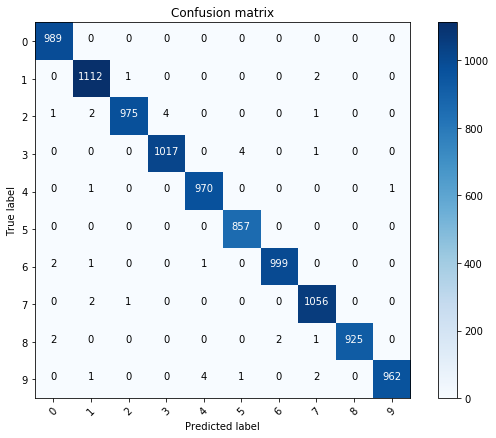

In [129]:
plot = plot_confusion_matrix(cmt, range(10))
plt.savefig('confusion_matrix.png')

In [138]:
cmt.sum(axis=1)

(10,)

Test Accuracy of the model on the 10000 test images: 99.60333333333334 %
Confusion matrix, without normalization
[[5922    0    0    0    0    0    0    0    1    0]
 [   0 6731    2    0    1    0    0    8    0    0]
 [   4    5 5910   16    2    1    0   15    5    0]
 [   0    1    1 6114    0   11    0    3    0    1]
 [   1    3    0    0 5832    0    0    1    1    4]
 [   0    0    0    3    1 5414    2    0    1    0]
 [   8    4    0    0    3    2 5897    0    4    0]
 [   0    5    4    0    3    0    0 6250    2    1]
 [   5    3    5    5    3    8    2    3 5814    3]
 [   2    3    1    3   34   14    0   11    3 5878]]


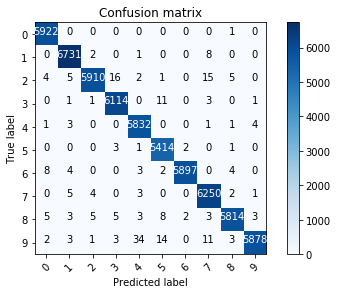

In [112]:
model.eval() # eval mode (batchnorm uses moving mean/variance instead of mini-batch mean/variance)
cmt = np.zeros((10,10),dtype=int)
with torch.no_grad():
    correct = 0
    total = 0
    for i, (images, labels) in enumerate(test_loader):
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        for p in range(100):
            cmt[labels[p].item(),outputs.argmax(axis=1)[p].item()] +=  1
    print('Test Accuracy of the model on the 10000 test images: {} %'.format(100 * correct / 60000))
plot = plot_confusion_matrix(cmt, range(10))
plt.savefig('confusion_matrix_2.png')

In [113]:
plt.rcParams["figure.figsize"] = (8,6)

Confusion matrix, without normalization
[[5922    0    0    0    0    0    0    0    1    0]
 [   0 6731    2    0    1    0    0    8    0    0]
 [   4    5 5910   16    2    1    0   15    5    0]
 [   0    1    1 6114    0   11    0    3    0    1]
 [   1    3    0    0 5832    0    0    1    1    4]
 [   0    0    0    3    1 5414    2    0    1    0]
 [   8    4    0    0    3    2 5897    0    4    0]
 [   0    5    4    0    3    0    0 6250    2    1]
 [   5    3    5    5    3    8    2    3 5814    3]
 [   2    3    1    3   34   14    0   11    3 5878]]


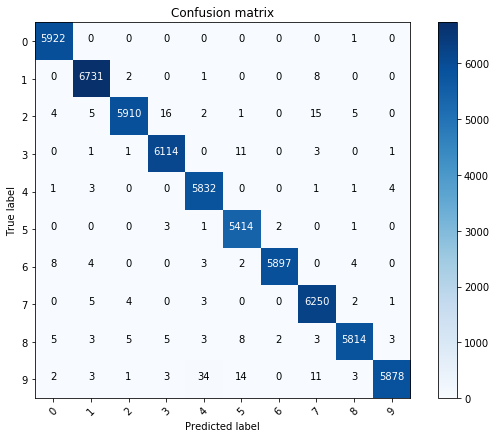

In [114]:
plot = plot_confusion_matrix(cmt, range(10))
plt.savefig('confusion_matrix_2.png')

In [116]:
cmt.sum(axis=1)

array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949])

Since there is also an uneven number of digits in the larger dataset, I'm going to stick with the smaller test sample

In [139]:
classes = pd.DataFrame(columns=list(range(10)))

In [152]:
classes

,0,1,2,3,4,5,6,7,8,9
label,989,1115,983,1022,972,857,1003,1059,930,970


In [141]:
for i,j in enumerate(cmt.sum(axis=1)):
    classes.loc['label',i] = j

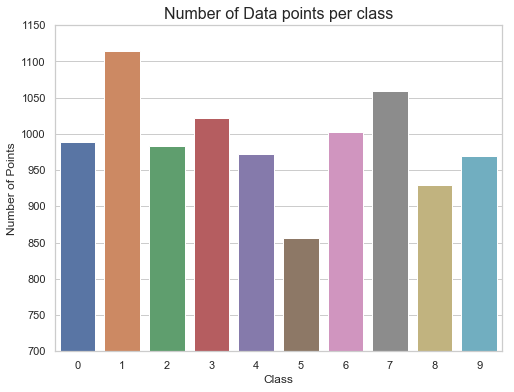

In [157]:
plt.figure()
sns.set(style='whitegrid')
ax = sns.barplot(data=classes)
ax.set_title('Number of Data points per class',fontsize=16)
ax.set_xlabel('Class')
ax.set_ylabel('Number of Points')
ax.set_ylim([700,1150])
plt.savefig('col_graph.png')

<Figure size 576x432 with 0 Axes>

In [74]:
def test():
    model.eval() # eval mode (batchnorm uses moving mean/variance instead of mini-batch mean/variance)
    with torch.no_grad():
        correct = 0
        total = 0
        for i, (images, labels) in enumerate(test_loader):
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            if i > 98:
                break
        print('Test Accuracy of the model on the 10000 test images: {} %'.format(100 * correct / 10000))

In [73]:
# Test the model
test()

99
9937
Test Accuracy of the model on the 10000 test images: 99.37 %


In [58]:
correct

59660

In [155]:
# Save the model checkpoint
torch.save(model.state_dict(), 'model.ckpt')